In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/submission.csv')

In [11]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [12]:
train[['hour', 'count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


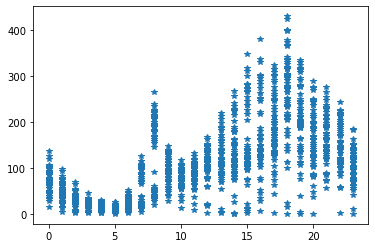

In [16]:
plt.plot('hour', 'count','*', data = train)

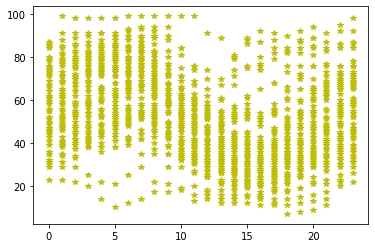

In [19]:
plt.plot('hour', 'hour_bef_humidity', 'y*', data = train)

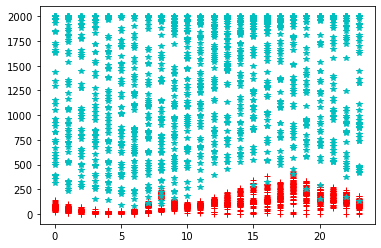

In [20]:
plt.plot('hour', 'count', 'r+', data = train)
plt.plot('hour', 'hour_bef_visibility', 'c*', data = train)

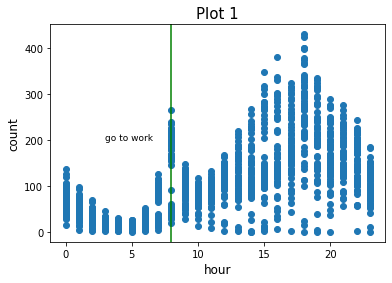

In [21]:
plt.title('Plot 1', fontsize = 15)
plt.plot('hour', 'count', 'o', data = train)
plt.xlabel('hour', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.axvline(8, color = 'green')
plt.text(3, 200, 'go to work', fontsize = 9)
plt.savefig('plot1.png')

In [22]:
import seaborn as sns

<AxesSubplot:>

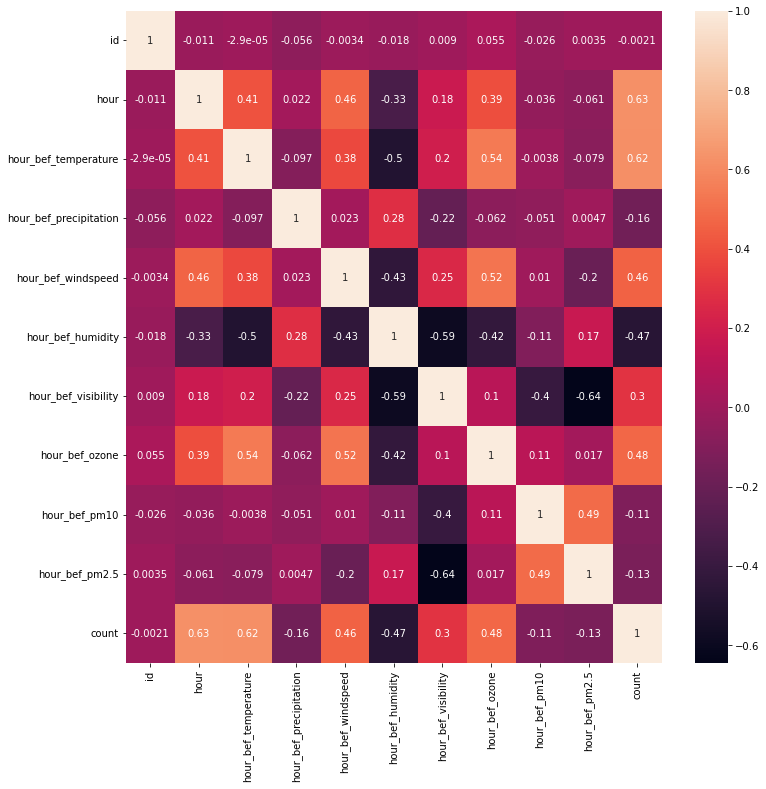

In [23]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), annot = True)

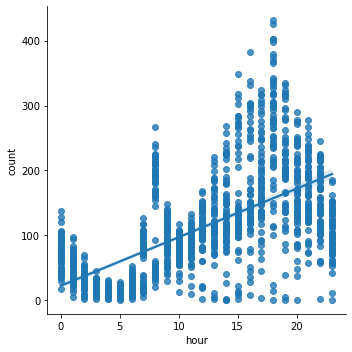

In [24]:
sns.lmplot(x = 'hour', y = 'count', data = train)

<AxesSubplot:ylabel='Frequency'>

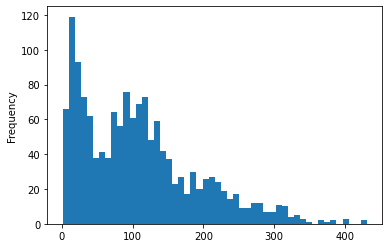

In [25]:
train['count'].plot(kind = 'hist', bins = 50)

<AxesSubplot:xlabel='count', ylabel='Density'>

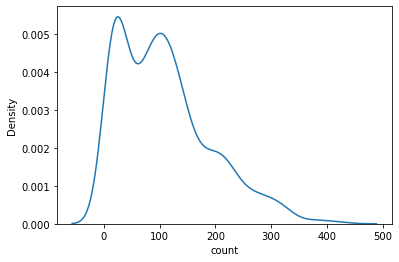

In [26]:
sns.kdeplot(train['count'])

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

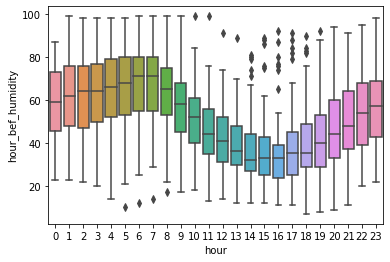

In [27]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train)

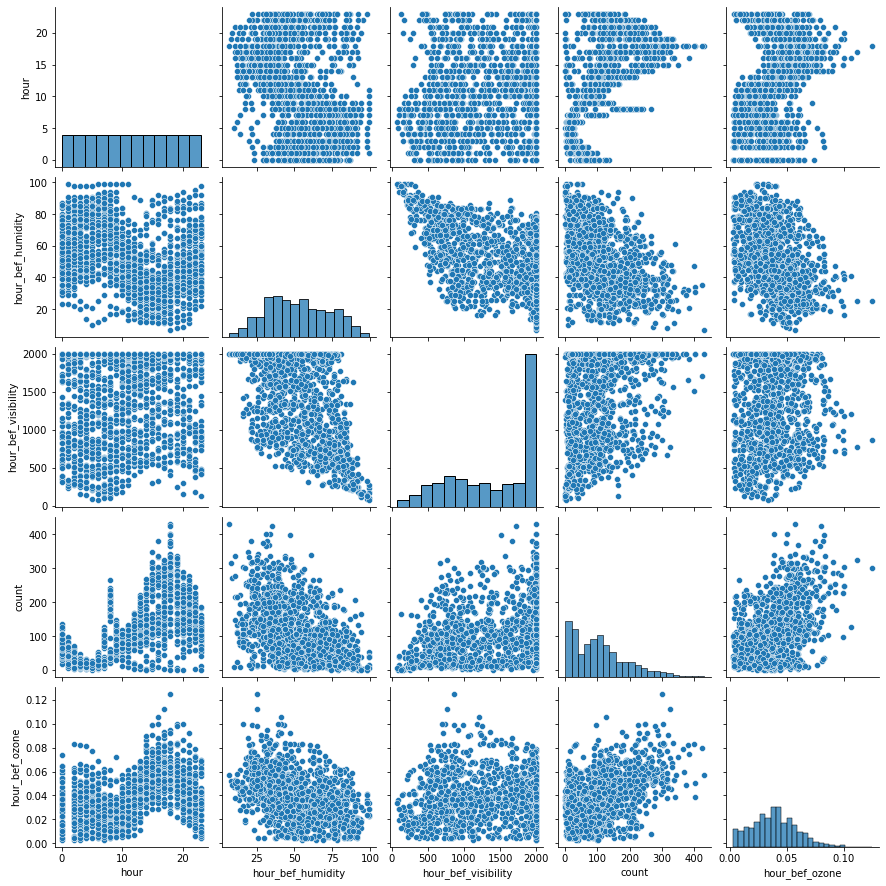

In [29]:
sns.pairplot(train[['hour', 'hour_bef_humidity', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

C:\Users\LG\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


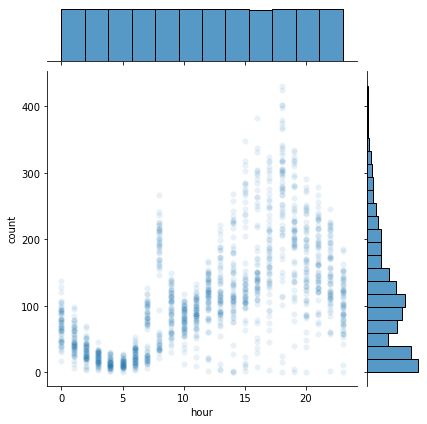

In [30]:
sns.jointplot('hour', 'count', data=train, alpha = 0.1)

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

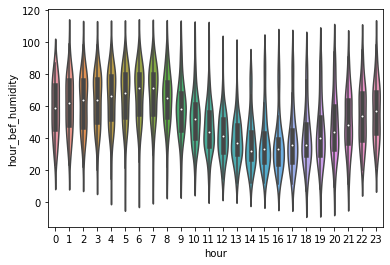

In [31]:
sns.violinplot(x='hour', y='hour_bef_humidity', data = train)

In [32]:
train[train['hour'] > 12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


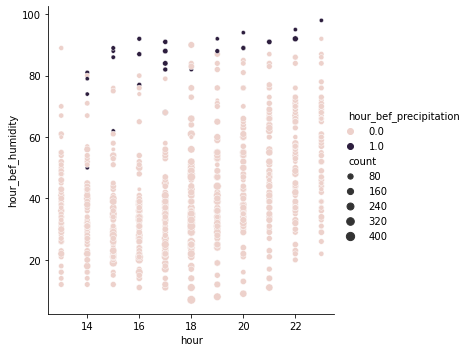

In [34]:
sns.relplot(x='hour', y='hour_bef_humidity', hue='hour_bef_precipitation', size='count', data=train[train['hour'] > 12])

In [35]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [36]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())

In [37]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [39]:
train_isna_sum = train.isna().sum()
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [40]:
na_cols = train_isna_sum[train_isna_sum != 0].index

In [59]:
def fill_na(df, col):
    df[col] = df[col].fillna(value=df[col].mean())
    print(col, '결측치 대체 완료')

In [42]:
fill_na(train, 'hour_bef_precipitation')

In [60]:
for col in na_cols:
    fill_na(train, col)

hour_bef_precipitation 결측치 대체 완료
hour_bef_windspeed 결측치 대체 완료
hour_bef_humidity 결측치 대체 완료
hour_bef_visibility 결측치 대체 완료
hour_bef_ozone 결측치 대체 완료
hour_bef_pm10 결측치 대체 완료
hour_bef_pm2.5 결측치 대체 완료


In [61]:
test_isna_sum = test.isna().sum()
test_na_cols = test_isna_sum[test_isna_sum != 0].index

In [76]:
for col in test_na_cols:
    fill_na = (test, str(col))
    print(col, '결측치 대체 완료')

hour_bef_temperature 결측치 대체 완료
hour_bef_precipitation 결측치 대체 완료
hour_bef_windspeed 결측치 대체 완료
hour_bef_humidity 결측치 대체 완료
hour_bef_visibility 결측치 대체 완료
hour_bef_ozone 결측치 대체 완료
hour_bef_pm10 결측치 대체 완료
hour_bef_pm2.5 결측치 대체 완료


In [87]:
test['hour_bef_pm2.5'] = test['hour_bef_pm2.5'].fillna(value=test['hour_bef_pm2.5'].mean())

In [88]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

In [93]:
model = KNeighborsRegressor(n_jobs = -1)

In [94]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']
X_test = test[column]

In [99]:
model_10 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 10)
model_15 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 15)
model_20 = KNeighborsRegressor(n_jobs = -1, n_neighbors = 20)

In [100]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)
np.mean(cross_val_score(model_10, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1978.8342459633764

In [101]:
np.mean(cross_val_score(model_15, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-1998.7233157484557

In [102]:
np.mean(cross_val_score(model_20, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error'))

-2000.841366391282

In [103]:
model_10.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=10)

In [107]:
submission['count'] = model_10.predict(X_test)

In [108]:
submission.to_csv('knn_10.csv', index = False)

In [109]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1)

In [110]:
submission['count'] = model.predict(X_test)

In [111]:
submission.to_csv('knn_5.csv', index = False)

In [112]:
train

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()

In [114]:
X_train = train.drop(['id', 'count'], axis = 1)
y_train = train['count']
X_test = test.drop('id', axis = 1)

In [116]:
X_train.shape, y_train.shape, X_test.shape

((1459, 9), (1459,), (715, 9))

In [118]:
param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [119]:
gs = GridSearchCV(estimator=model, param_grid=param, scoring = 'neg_mean_squared_error', cv = 3)

In [120]:
gs

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [121]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [122]:
submission['count'] = gs.predict(X_test)

In [123]:
submission.to_csv('gridsearch.csv', index = False)

In [124]:
gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 250}

In [125]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.392346,0.041291,0.016793,0.009781,5,30,50,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2097.322901,-1789.811074,-1763.159253,-1883.431076,151.635230,11
1,0.928850,0.119877,0.056354,0.017907,5,30,150,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2104.926874,-1785.770532,-1776.499888,-1889.065765,152.683769,12
2,1.102751,0.193328,0.041282,0.008227,5,30,250,"{'max_depth': 5, 'min_samples_split': 30, 'n_e...",-2129.787562,-1761.357112,-1779.070290,-1890.071655,169.658925,13
3,0.182384,0.016853,0.011641,0.003665,5,50,50,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2196.988106,-1841.590172,-1807.847906,-1948.808728,176.029141,18
4,0.530149,0.009419,0.025014,0.004070,5,50,150,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2160.686275,-1815.011107,-1822.924728,-1932.874037,161.119973,16
5,0.927397,0.052358,0.042410,0.002882,5,50,250,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",-2173.679363,-1826.487196,-1826.496525,-1942.221028,163.665759,17
6,0.170773,0.002863,0.011637,0.001695,5,70,50,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2319.571295,-1918.870161,-1851.974021,-2030.138492,206.474024,27
7,0.554552,0.043900,0.026596,0.008932,5,70,150,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2280.619012,-1915.638474,-1822.266143,-2006.174543,197.769939,26
8,0.926957,0.051133,0.043221,0.009646,5,70,250,"{'max_depth': 5, 'min_samples_split': 70, 'n_e...",-2278.153525,-1891.049123,-1837.034809,-2002.079153,196.455561,25
9,0.414798,0.209659,0.021943,0.007100,6,30,50,"{'max_depth': 6, 'min_samples_split': 30, 'n_e...",-2025.345088,-1683.990495,-1739.429767,-1816.255117,149.571255,5


In [126]:
from sklearn.model_selection import RandomizedSearchCV
param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [128]:
model = RandomForestRegressor()

In [129]:
rs = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter = 30, random_state=0, scoring = 'neg_mean_squared_error', n_jobs = -1)

In [130]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [131]:
rs.best_params_

{'n_estimators': 171, 'min_samples_split': 34, 'max_depth': 7}

In [132]:
submission['count'] = rs.predict(X_test)
submission.to_csv('randomsearch.csv', index = False)
pd.DataFrame(rs.cv_results_).sort_values('mean_test_score', ascending = False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,1.755683,0.300557,0.082082,0.039179,171,34,7,"{'n_estimators': 171, 'min_samples_split': 34,...",-1670.373641,-1956.819366,-1567.415122,-1824.135232,-1476.464593,-1699.041591,173.081310,1
16,1.137180,0.037668,0.042885,0.008920,139,35,7,"{'n_estimators': 139, 'min_samples_split': 35,...",-1690.204542,-1970.130506,-1549.361283,-1841.251277,-1468.825856,-1703.954693,183.887832,2
19,0.483730,0.029729,0.028229,0.009254,56,43,7,"{'n_estimators': 56, 'min_samples_split': 43, ...",-1732.765813,-1982.270637,-1603.235584,-1862.317438,-1521.611053,-1740.440105,167.395472,3
29,0.743883,0.067194,0.044783,0.040083,80,42,7,"{'n_estimators': 80, 'min_samples_split': 42, ...",-1717.001861,-1997.676199,-1634.248164,-1856.537040,-1526.186547,-1746.329962,165.653929,4
17,1.891317,0.089964,0.073706,0.014414,233,44,7,"{'n_estimators': 233, 'min_samples_split': 44,...",-1723.138015,-1986.372546,-1595.737118,-1903.213131,-1531.675112,-1748.027184,174.075354,5
6,1.001956,0.179172,0.038428,0.003525,75,36,6,"{'n_estimators': 75, 'min_samples_split': 36, ...",-1740.963188,-1993.866251,-1625.093798,-1886.760155,-1522.412552,-1753.819189,170.634362,6
2,1.143148,0.304475,0.070612,0.032207,95,39,6,"{'n_estimators': 95, 'min_samples_split': 39, ...",-1714.971714,-2011.920339,-1655.608723,-1903.360737,-1513.439200,-1759.860143,177.613836,7
3,1.042196,0.105653,0.075405,0.029069,98,48,7,"{'n_estimators': 98, 'min_samples_split': 48, ...",-1759.550457,-2028.800804,-1631.456760,-1884.123907,-1519.572196,-1764.700825,179.932889,8
1,3.520732,0.453452,0.101016,0.022243,249,43,6,"{'n_estimators': 249, 'min_samples_split': 43,...",-1752.787526,-2028.164646,-1641.374870,-1901.231717,-1520.158370,-1768.743426,180.623579,9
18,1.522560,0.072931,0.053258,0.009702,177,41,6,"{'n_estimators': 177, 'min_samples_split': 41,...",-1751.296986,-2036.026674,-1633.465774,-1900.610238,-1532.306811,-1770.741297,180.729592,10


In [133]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [134]:
submission['count'] = model.predict(X_test)

In [135]:
submission.to_csv('rf_default.csv', index = False)

In [136]:
model_100 = RandomForestRegressor(n_estimators=100, n_jobs = -1, random_state=10)
model_200 = RandomForestRegressor(n_estimators=200, n_jobs = -1, random_state=10)
model_300 = RandomForestRegressor(n_estimators=300, n_jobs = -1, random_state=10)
model_500 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10)

<AxesSubplot:xlabel='n_estimators'>

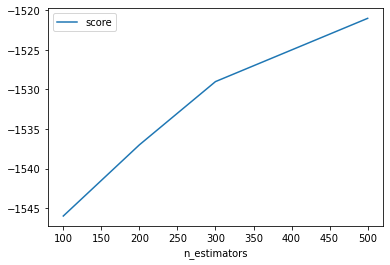

In [137]:
pd.DataFrame({'n_estimators':[100, 200, 300, 500], 'score':[-1546, -1537, -1529, -1521]}).plot('n_estimators', 'score')

In [138]:
%%time
score = cross_val_score(model_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1546.8865621858963
Wall time: 2.93 s


In [139]:
%%time
score = cross_val_score(model_200, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1537.2335820896296
Wall time: 6.91 s


In [140]:
%%time
score = cross_val_score(model_300, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1529.93820386781
Wall time: 8.97 s


In [141]:
%%time
score = cross_val_score(model_500, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1521.7993785402248
Wall time: 18.8 s


In [142]:
model_sam_30 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)
model_sam_50 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=50)
model_sam_100 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=100)

In [143]:
%%time
score = cross_val_score(model_sam_30, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1647.5599150463906
Wall time: 12 s


In [144]:
%%time
score = cross_val_score(model_sam_50, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1746.5733867422452
Wall time: 12.3 s


In [145]:
%%time
score = cross_val_score(model_sam_100, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2009.2340561302196
Wall time: 10.8 s


In [146]:
final_model = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30)

In [147]:
final_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=30, n_estimators=500, n_jobs=-1,
                      random_state=10)

In [148]:
submission['count'] = final_model.predict(X_test)

In [149]:
submission.to_csv('estimators_500_samples_30.csv', index = False)

<AxesSubplot:ylabel='Frequency'>

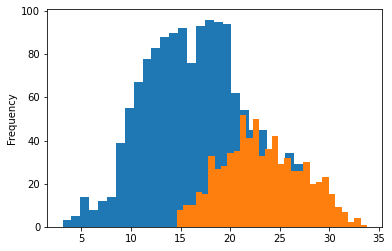

In [150]:
train['hour_bef_temperature'].plot(bins = 30, kind = 'hist')
test['hour_bef_temperature'].plot(bins = 30, kind = 'hist')

In [151]:
rf_maxf_02 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.2)
rf_maxf_04 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.4)
rf_maxf_06 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.6)
rf_maxf_08 = RandomForestRegressor(n_estimators=500, n_jobs = -1, random_state=10, min_samples_split=30, max_features=0.8)

In [152]:
%%time
score = cross_val_score(rf_maxf_02, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-2253.430187736337
Wall time: 8.19 s


In [153]:
%%time
score = cross_val_score(rf_maxf_04, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1830.923118087825
Wall time: 8.44 s


In [154]:
%%time
score = cross_val_score(rf_maxf_06, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1714.0867530230257
Wall time: 8.68 s


In [155]:
%%time
score = cross_val_score(rf_maxf_08, X_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error')
print(np.mean(score))

-1673.787363204249
Wall time: 8.39 s


In [156]:
from sklearn.model_selection import train_test_split

In [157]:
column = ['hour', 'hour_bef_temperature']
X_train = train[column]
y_train = train['count']

In [158]:
X_train.shape, y_train.shape

((1459, 2), (1459,))

In [159]:
X_trn, X_val, y_trn, y_val = train_test_split(X_train, y_train, test_size = 0.25, shuffle = True, random_state = 10)

In [160]:
X_trn.shape, X_val.shape, y_trn.shape, y_val.shape

((1094, 2), (365, 2), (1094,), (365,))

In [162]:
kfolds = KFold(n_splits=10, shuffle = True, random_state=10)

In [163]:
kfolds = KFold(n_splits=5, shuffle = True, random_state=5)

In [164]:
example = np.array([[0,0],
[1,1],
[2,2],
[3,3],
[4,4],
[10,10],
[11,11],
[12,12],
[13,13],
[14,14]])

In [165]:
for idx_trn, idx_val in kfolds.split(example):
    print('TRAIN')
    print(example[idx_trn])
    print('VALIDATION')
    print(example[idx_val])

TRAIN
[[ 0  0]
 [ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [11 11]
 [12 12]
 [13 13]]
VALIDATION
[[10 10]
 [14 14]]
TRAIN
[[ 0  0]
 [ 1  1]
 [ 3  3]
 [10 10]
 [11 11]
 [12 12]
 [13 13]
 [14 14]]
VALIDATION
[[2 2]
 [4 4]]
TRAIN
[[ 0  0]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [10 10]
 [11 11]
 [13 13]
 [14 14]]
VALIDATION
[[ 1  1]
 [12 12]]
TRAIN
[[ 1  1]
 [ 2  2]
 [ 3  3]
 [ 4  4]
 [10 10]
 [11 11]
 [12 12]
 [14 14]]
VALIDATION
[[ 0  0]
 [13 13]]
TRAIN
[[ 0  0]
 [ 1  1]
 [ 2  2]
 [ 4  4]
 [10 10]
 [12 12]
 [13 13]
 [14 14]]
VALIDATION
[[ 3  3]
 [11 11]]
